In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('Pagedata.csv')
df.drop(['NoVotes', 'YesVotes'], axis = 1, inplace = True)

In [10]:
average = df['Positive%'].mean()
df['AboveAverage'] = df['Positive%'] >= average
df['Quality'] = pd.qcut(df['Positive%'], 4, 
                        labels=["Worst", "Below median", "Above median", "Best"])
df['VotesWeighted'] = df['TotalVotes']/df['UniquePageviews']
df['Section'] = df['Page'].str.split('\/', n=2).str.get(1)
print('Average: ', round(100*average,1), '%', sep = '')

df.sort_values('TotalVotes', ascending = False).head(10)

Average: 72.5%


,Page,Template,UniquePageviews,TotalVotes,Positive%,WordCount,AboveAverage,Quality,VotesWeighted,Section
96,/benefits/sick-or-disabled-people-and-carers/h...,BetaContentPage,594717,19452.0,0.883405,1564,True,Best,0.032708,benefits
14,/benefits/benefits-introduction/what-benefits-...,AdviceguidePage,553088,14992.0,0.619664,248,False,Worst,0.027106,benefits
106,/benefits/sick-or-disabled-people-and-carers/p...,BetaContentPage,331303,10108.0,0.930055,525,True,Best,0.030510,benefits
107,/benefits/sick-or-disabled-people-and-carers/p...,BetaContentPage,549322,7965.0,0.906089,653,True,Best,0.014500,benefits
102,/benefits/sick-or-disabled-people-and-carers/p...,BetaContentPage,263617,5941.0,0.915502,688,True,Best,0.022536,benefits
602,/immigration/visas-family-and-friends/getting-...,BetaContentPage,235322,5482.0,0.836738,599,True,Above median,0.023296,immigration
210,/consumer/get-more-help/report-to-trading-stan...,BetaContentPage,259953,5255.0,0.750143,414,True,Above median,0.020215,consumer
457,/family/death-and-wills/who-can-inherit-if-the...,AdviceguidePage,400922,4772.0,0.864837,1815,True,Best,0.011903,family
105,/benefits/sick-or-disabled-people-and-carers/p...,BetaContentPage,292931,4727.0,0.807912,1201,True,Above median,0.016137,benefits
162,/consumer/buying-or-repairing-a-car/problems-w...,BetaContentPage,140460,4721.0,0.681212,5,False,Below median,0.033611,consumer


In [11]:
cols = ['UniquePageviews', 'TotalVotes', 'Positive%', 'WordCount', 'VotesWeighted']
correlation_beta = df[cols][df['Template'] == 'BetaContentPage'].corr()
correlation_old = df[cols][df['Template'] == 'AdviceguidePage'].corr()
correlation_benefits = df[cols][df['Page'].str.startswith('/debt-and-money/')].corr()

print('all pages:', df[cols].corr(), sep = '\n', end = '\n\n')
print('beta content pages:', correlation_beta, sep = '\n', end = '\n\n')
print('old content pages:', correlation_old, sep = '\n', end = '\n\n')
print('debt section (all templates):', correlation_benefits, sep = '\n', end = '\n')

all pages:
                 UniquePageviews  TotalVotes  Positive%  WordCount  \
UniquePageviews         1.000000    0.795537   0.107060   0.196424   
TotalVotes              0.795537    1.000000   0.132599   0.021330   
Positive%               0.107060    0.132599   1.000000   0.014540   
WordCount               0.196424    0.021330   0.014540   1.000000   
VotesWeighted          -0.104509    0.230574   0.033722  -0.283557   

                 VotesWeighted  
UniquePageviews      -0.104509  
TotalVotes            0.230574  
Positive%             0.033722  
WordCount            -0.283557  
VotesWeighted         1.000000  

beta content pages:
                 UniquePageviews  TotalVotes  Positive%  WordCount  \
UniquePageviews         1.000000    0.786099   0.111566   0.132433   
TotalVotes              0.786099    1.000000   0.147295   0.007171   
Positive%               0.111566    0.147295   1.000000   0.018792   
WordCount               0.132433    0.007171   0.018792   1.000000   

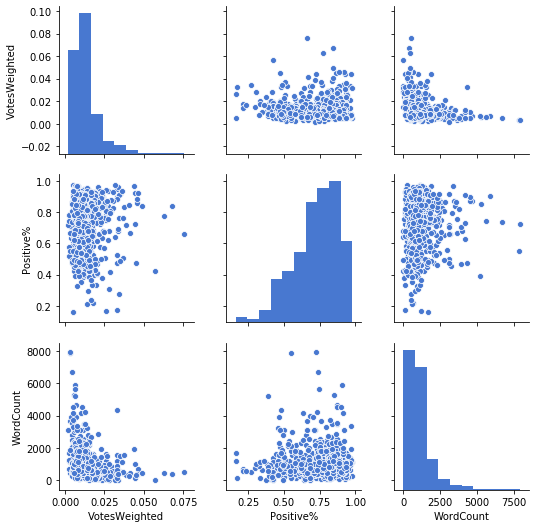

In [12]:
sns.pairplot(data=df[['VotesWeighted', 'Positive%', 'WordCount']])

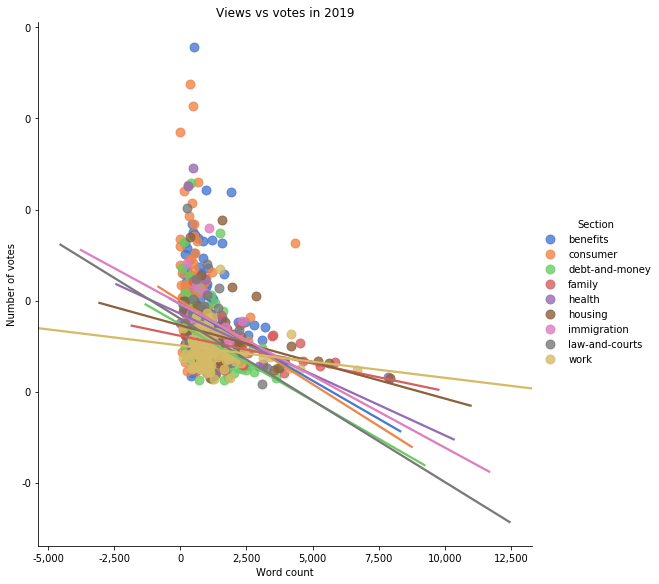

In [13]:
my_palette = [(0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
           (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
           (0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
              (0.41568627450980394, 0.8, 0.39215686274509803)]

chart = sns.lmplot(x = 'WordCount', 
            y = 'VotesWeighted',
            data = df, 
            height = 8, 
            ci=None, 
            robust = False,
            scatter_kws={"s": 80}, hue = 'Section', palette = 'muted')

chart.set(title = 'Views vs votes in 2019', xlabel='Word count', ylabel='Number of votes')
ticks_x = chart.axes[0][0].get_xticks()
xlabels = ['{:,.0f}'.format(x) for x in ticks_x]

ticks_y = chart.axes[0][0].get_yticks()
ylabels = ['{:,.0f}'.format(y) for y in ticks_y]

chart.set_xticklabels(xlabels)
chart.set_yticklabels(ylabels)


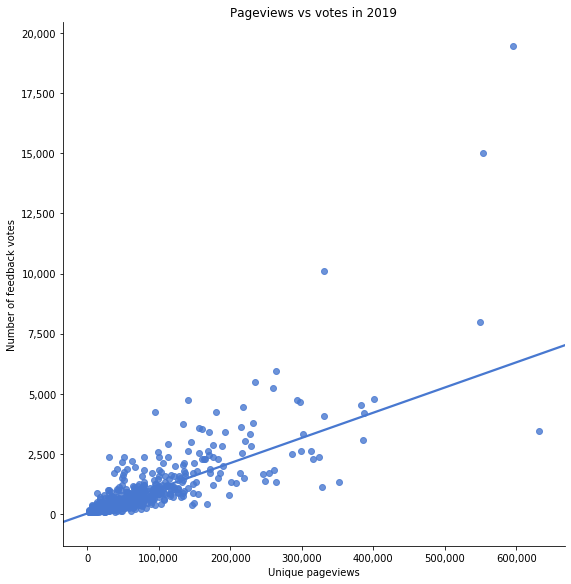

In [14]:
sns.set_palette('muted')
chart = sns.lmplot(x = 'UniquePageviews', 
            y = 'TotalVotes',
            data = df, 
            height = 8, 
            ci=None,
            robust = True)

chart.set(title = 'Pageviews vs votes in 2019', xlabel='Unique pageviews', ylabel='Number of feedback votes')
ticks_x = chart.axes[0][0].get_xticks()
xlabels = ['{:,.0f}'.format(x) for x in ticks_x]

ticks_y = chart.axes[0][0].get_yticks()
ylabels = ['{:,.0f}'.format(y) for y in ticks_y]

chart.set_xticklabels(xlabels)
chart.set_yticklabels(ylabels)


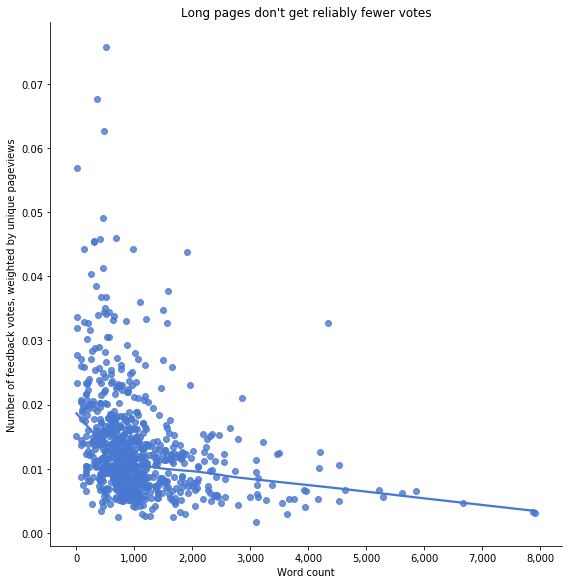

In [27]:
sns.set_palette('muted')
chart = sns.lmplot(x = 'WordCount', 
            y = 'VotesWeighted',
            data = df, height = 8, lowess = True)

chart.set(title = "Long pages don't get reliably fewer votes", xlabel='Word count', ylabel='Number of feedback votes, weighted by unique pageviews')
ticks_x = chart.axes[0][0].get_xticks()
xlabels = ['{:,.0f}'.format(x) for x in ticks_x]

chart.set_xticklabels(xlabels)


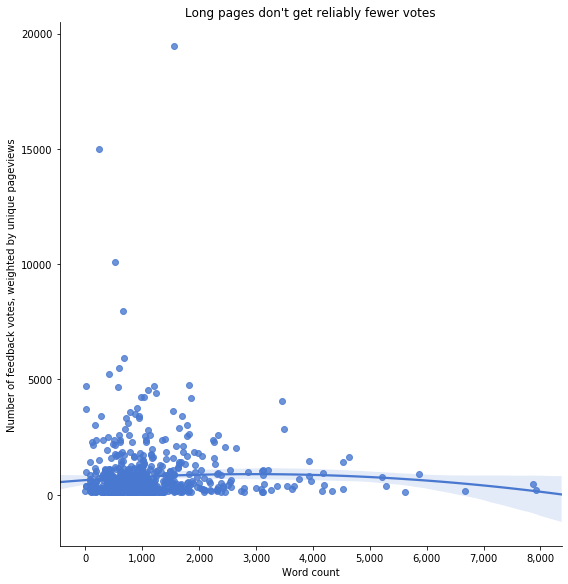

In [24]:
sns.set_palette('muted')
chart = sns.lmplot(x = 'WordCount', 
            y = 'TotalVotes',
            data = df, height = 8, order = 2)

chart.set(title = "Long pages don't get reliably fewer votes", xlabel='Word count', ylabel='Number of feedback votes, weighted by unique pageviews')
ticks_x = chart.axes[0][0].get_xticks()
xlabels = ['{:,.0f}'.format(x) for x in ticks_x]

chart.set_xticklabels(xlabels)


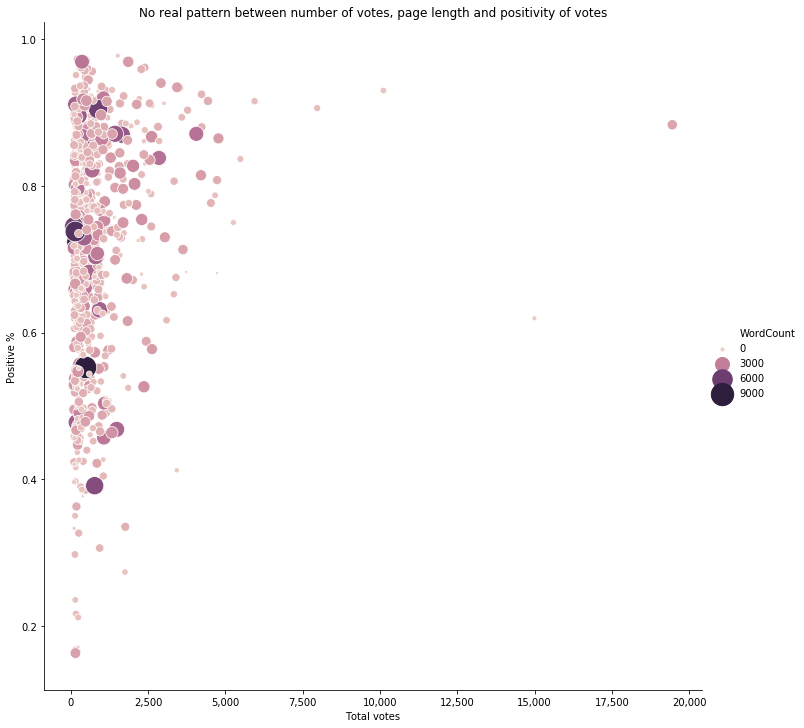

In [50]:
chart = sns.relplot(x='TotalVotes', 
            y='Positive%', 
            hue='WordCount', 
            data=df,
            size='WordCount',
            sizes=(10,500),
            height = 10)

chart.set(title = 'No real pattern between number of votes, page length and positivity of votes', 
          xlabel='Total votes', ylabel='Positive %')
ticks_x = chart.axes[0][0].get_xticks()
xlabels = ['{:,.0f}'.format(x) for x in ticks_x]

ticks_y = chart.axes[0][0].get_yticks()

chart.set_xticklabels(xlabels)
